In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

import time
import changefont as cf
import os
os.chdir(os.getcwd())

from ema_workbench.analysis import parcoords
from ema_workbench import save_results, load_results

C:\Users\Shajee\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Shajee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
results = pd.read_csv("wcs_100k_nfe_V4.csv")
convergence = pd.read_csv("wcs_con_100k_nfe_V4.csv")

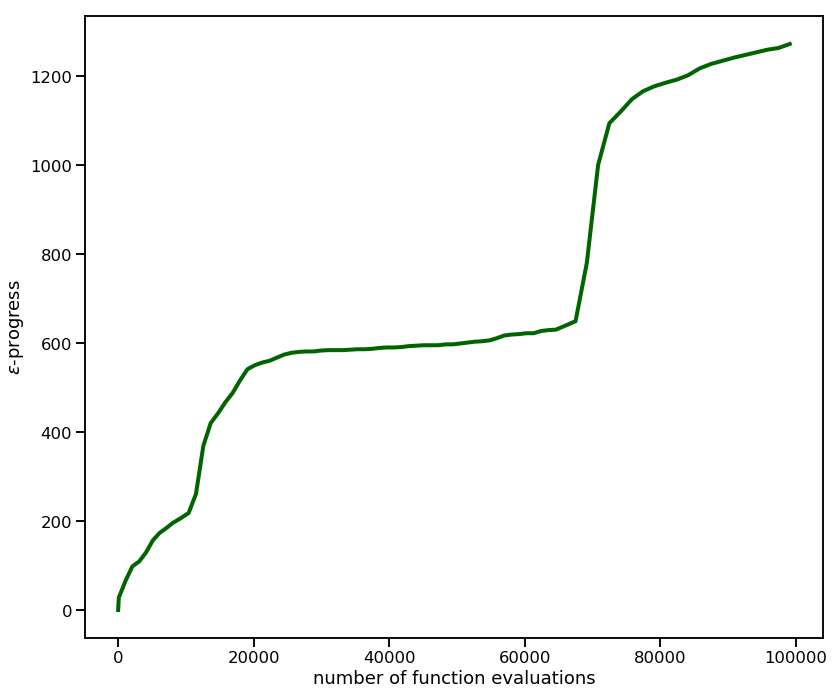

In [3]:
sns.set_context("talk")
plt.figure(figsize=(12,10))
plt.plot(convergence.nfe, convergence.epsilon_progress, color = "darkgreen", linewidth=4)
plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.tight_layout()
plt.savefig("directed_search_wcs_convergence_V4.png", bbox_inches='tight')

In [4]:
results = results.drop(results.columns[0], axis = 1)

len(results)

414

In [5]:
parresults = results.iloc[:,[1,2,4,5,7]]
parresults.columns = ["ECS Distribution", "Damage Function", "Init. EOR Growth Rate", "Population Growth Rate", "Price of Backstop Technology"]

In [6]:
scenlimits = pd.DataFrame({"ECS Distribution":[0,2], "Damage Function":[0,2], 
                           "Init. EOR Growth Rate":[-0.012, -0.008],
                           "Population Growth Rate":[0.1, 0.15], 
                           "Price of Backstop Technology":[100, 600]})

C:\Users\Shajee\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


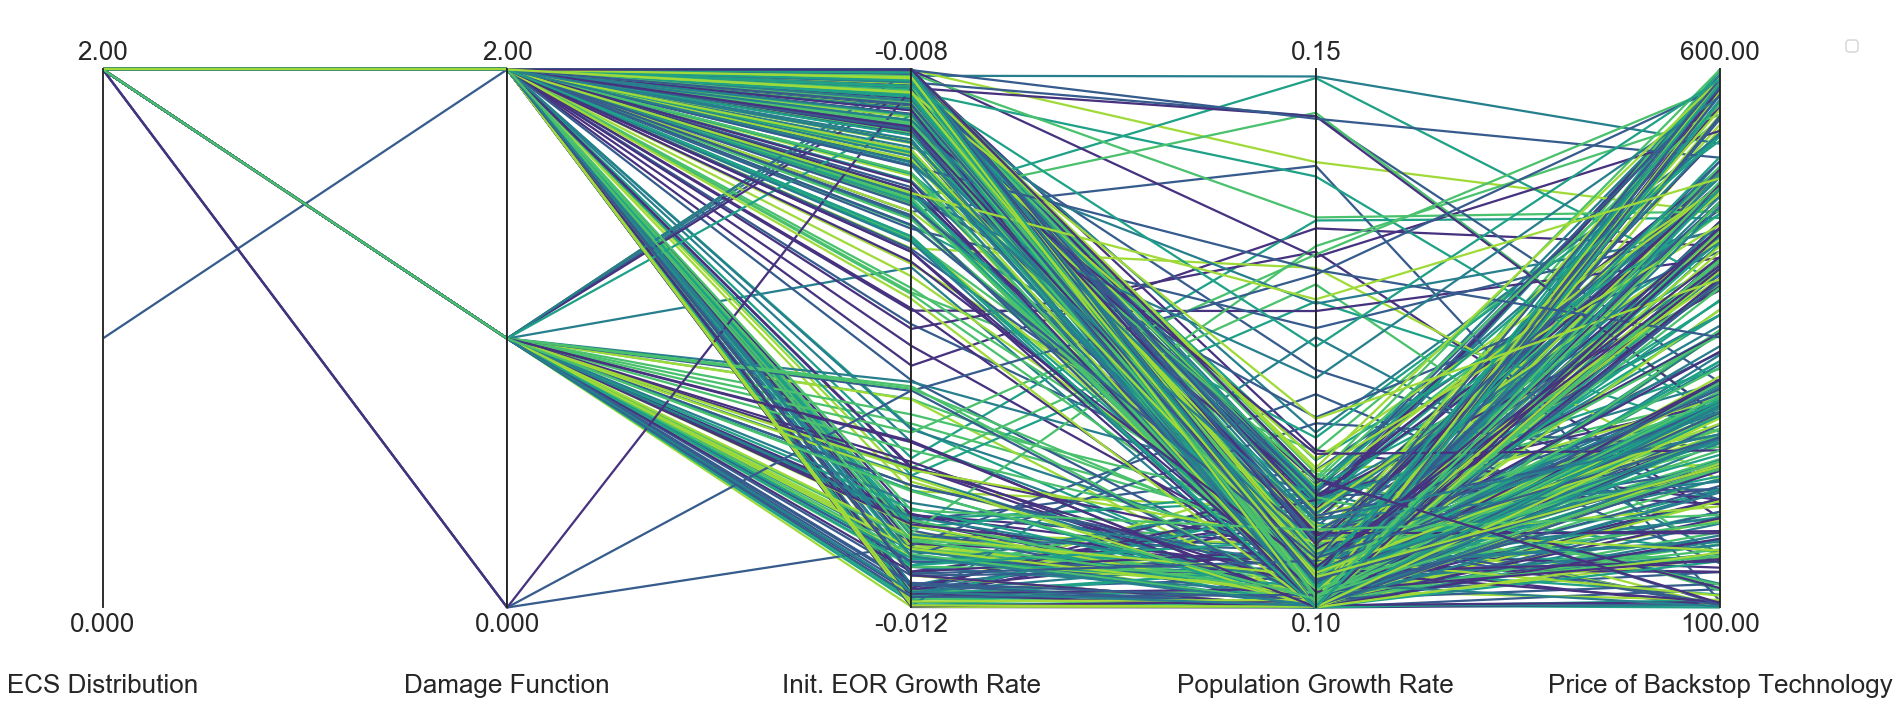

In [7]:
paraxes = parcoords.ParallelAxes(parcoords.get_limits(scenlimits), rot=0)
paraxes.fig.set_size_inches(25,10)
paraxes.plot(parresults)
paraxes.legend()
cf.change_fontsize(paraxes, fs=26)
plt.show()

paraxes.fig.savefig("directed_search_414_wcs_V4.png", bbox_inches='tight')

In [8]:
results_specified = results[(results["Utility 2300"] <= 0) 
                            & (results["Atmospheric Temperature 2050"] >= 2.7) 
                            & (results["Atmospheric Temperature 2100"] >= 4) 
                            & (results["Atmospheric Temperature 2150"] >= 4) 
                            & (results["Atmospheric Temperature 2200"] >= 4) 
                            & (results["Atmospheric Temperature 2300"] >= 4)]

In [9]:
len(results_specified)

138

In [10]:
parresults_specified = results_specified.iloc[:,[1,2,4,5,7]]

In [11]:
parresults_specified.columns = ["ECS Distribution", "Damage Function", 
                                "Init. EOR Growth Rate", "Population Growth Rate", 
                                "Price of Backstop Technology"]

C:\Users\Shajee\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


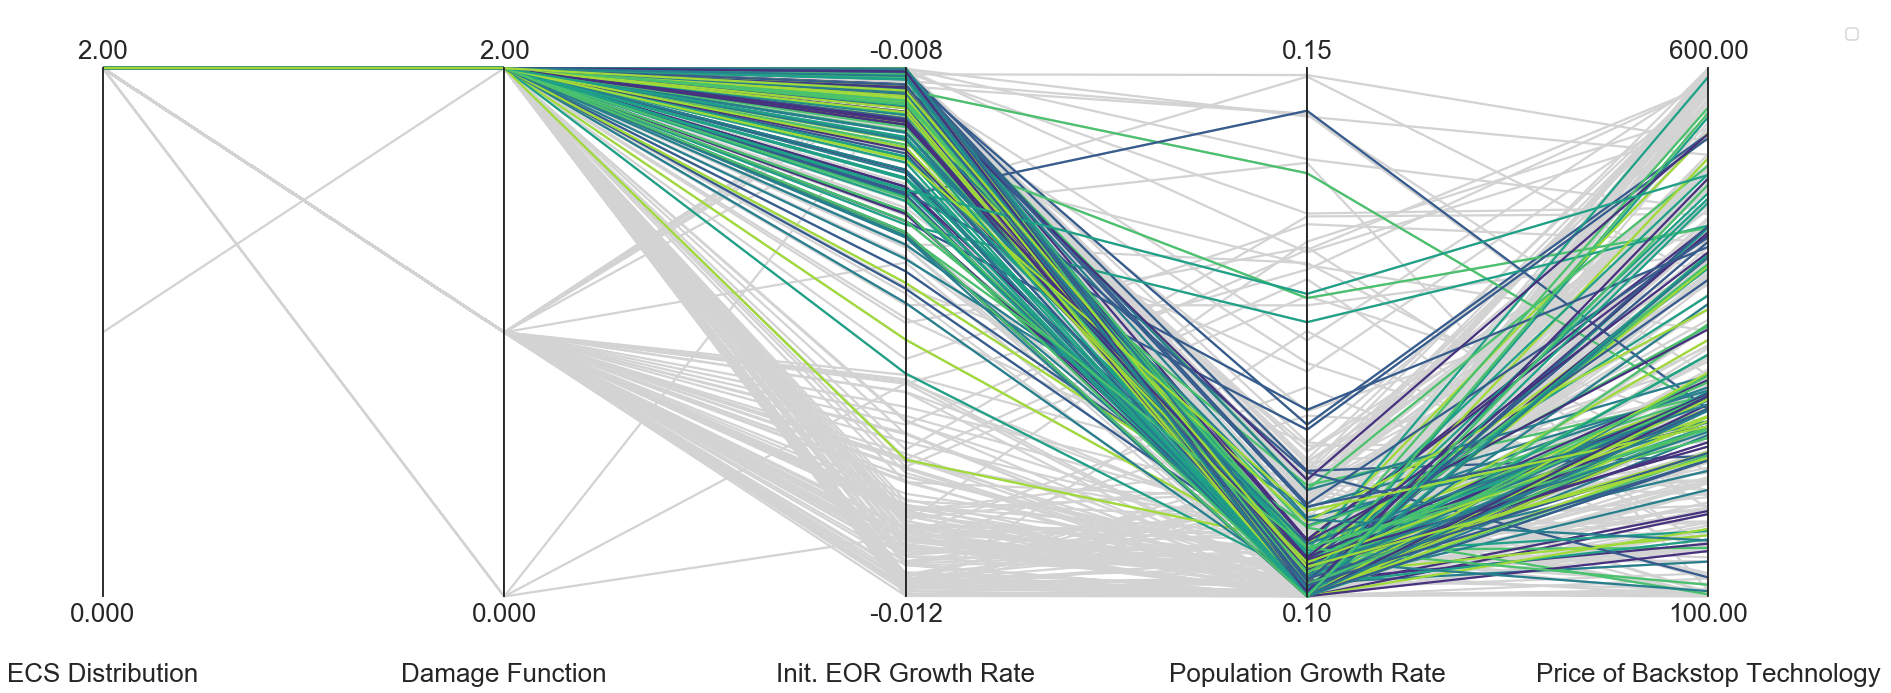

In [13]:
sns.set_context("talk", font_scale=1.3)
paraxes = parcoords.ParallelAxes(parcoords.get_limits(scenlimits), rot=0)
paraxes.fig.set_size_inches(25,10)
paraxes.plot(parresults, color = "lightgray")
paraxes.plot(parresults_specified)
paraxes.legend()
cf.change_fontsize(paraxes, fs=26)
plt.show()

paraxes.fig.savefig("directed_search_327_wcs")